<a href="https://colab.research.google.com/github/JustinThomasCSUMB/cst383project/blob/main/cst383project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CST383 Project
**Team members:**  
Justin Thomas  
Jordan Bienz  
Michael Janes

## Project Description
<>

# Read the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

url = "https://raw.githubusercontent.com/JustinThomasCSUMB/cst383project/main/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)


## Initial Exploration

How much data is there?  
 - There is 5,110 total inital entries.

How many NA values are in the data?  
 - There are 201 rows that have NA values, all of the NA values are in the BMI column. These rows make up ~4% of the total rows  

Does the dataset contain much obviously bad data?  

What are the types of the columns?  


In [ ]:
shape = df.shape
print("Data Shape:", shape)
print('\nInfo:', df.info())
print('\nDescribe:',df.describe())

Data Shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Info: None

Describe:                  id          age  ...          bmi       stroke
count   5110.000000  5110.000000  ...  4909.000

In [ ]:
print("Percent of values null per column")
print(df.isnull().sum() / len(df) * 100) # % of null values

print("\nTotal null values")
print(df.isnull().sum()) #

Percent of values null per column
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

Total null values
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
print(df.head(10))

      id  gender   age  ...   bmi   smoking_status stroke
0   9046    Male  67.0  ...  36.6  formerly smoked      1
1  51676  Female  61.0  ...   NaN     never smoked      1
2  31112    Male  80.0  ...  32.5     never smoked      1
3  60182  Female  49.0  ...  34.4           smokes      1
4   1665  Female  79.0  ...  24.0     never smoked      1
5  56669    Male  81.0  ...  29.0  formerly smoked      1
6  53882    Male  74.0  ...  27.4     never smoked      1
7  10434  Female  69.0  ...  22.8     never smoked      1
8  27419  Female  59.0  ...   NaN          Unknown      1
9  60491  Female  78.0  ...  24.2          Unknown      1

[10 rows x 12 columns]


In [ ]:
possible_columns = ['gender','age','hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']
print("Useful Predictors:\n", possible_columns)

Useful Predictors:
 ['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']


# Initial Preprocessing and Cleaning

remove columns with lots of missing data  

remove columns that are useless  

remove columns that are not relevant to what you want to do  

remove other missing data  


In [ ]:
df = df.dropna() #drop all na/null values
df = df.drop(columns=['ever_married','work_type','Residence_type','id']) # remove useless columns/ not needed
print("Data with removed columns:\n", df.head(5))

Data with removed columns:
    gender   age  hypertension  ...   bmi   smoking_status  stroke
0    Male  67.0             0  ...  36.6  formerly smoked       1
2    Male  80.0             0  ...  32.5     never smoked       1
3  Female  49.0             0  ...  34.4           smokes       1
4  Female  79.0             1  ...  24.0     never smoked       1
5    Male  81.0             0  ...  29.0  formerly smoked       1

[5 rows x 8 columns]


# Exploration and Visualization

* histograms of single numeric variables<br>
* bar plots of value counts of single categorical variables<br>
* grid of scatter plots (numeric variables)<br>
* violin/bar plots for categorical/numeric variable pairs<br>
* three-variable plots, such as scatterplots with color or shape of points as a<br>
* third variable, or grouped bar plots<br>
* plots of data over time (if applicable)<br>





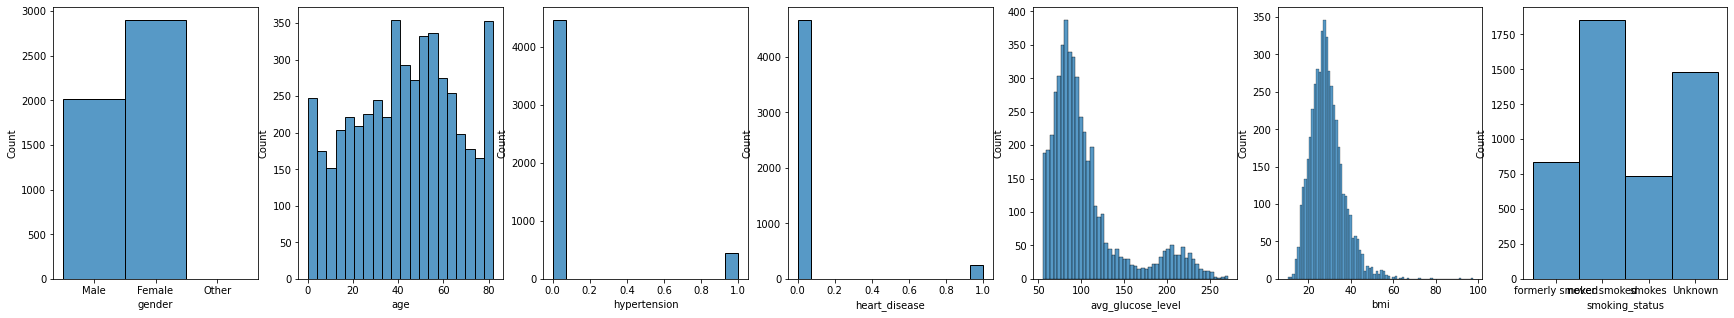

In [ ]:
# histograms of single numeric variables
fig, ax = plt.subplots(1, len(possible_columns), figsize=[30,5])
for i,p in enumerate(possible_columns):
    sns.histplot(data=df, x=p,ax=ax[i])

Text(0, 0.5, 'Total Participants')

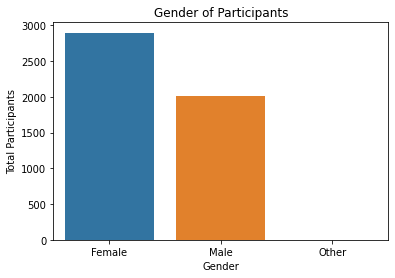

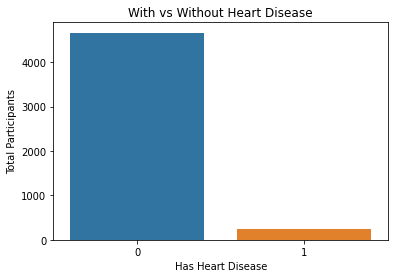

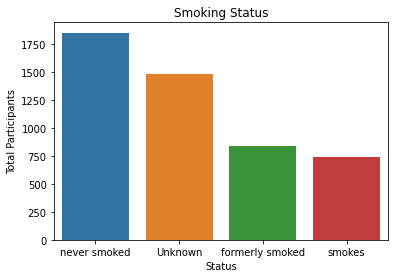

In [ ]:
# bar plots of value counts of single categorical variables
plt.figure()
gender = df['gender'].value_counts()
sns.barplot(x=gender.index, y=gender)
plt.title("Gender of Participants")
plt.xlabel('Gender')
plt.ylabel('Total Participants')

plt.figure()
heartDisease = df['heart_disease'].value_counts()
sns.barplot(x=heartDisease.index, y=heartDisease)
plt.title("With vs Without Heart Disease")
plt.xlabel('Has Heart Disease')
plt.ylabel('Total Participants')

plt.figure()
smoker = df['smoking_status'].value_counts()
sns.barplot(x=smoker.index, y=smoker)
plt.title("Smoking Status")
plt.xlabel('Status')
plt.ylabel('Total Participants')

<Figure size 432x288 with 0 Axes>

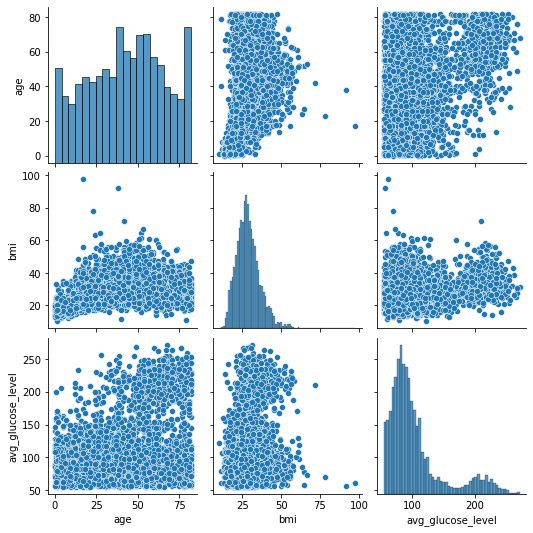

In [ ]:
# scatter and histogram (pair plot) of numerical data
plt.figure()
scatNumDf = df[['age','bmi','avg_glucose_level']]
sns.pairplot(scatNumDf)

Text(0.5, 1.0, 'Smoking and Age Comparison')

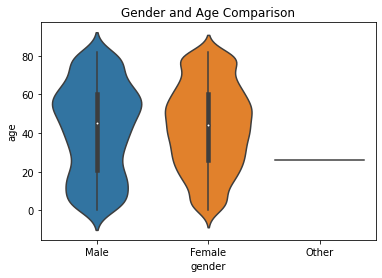

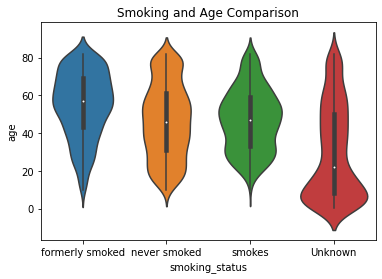

In [ ]:
# Violin plot
plt.figure()
sns.violinplot(x='gender', y='age', data=df)
plt.title('Gender and Age Comparison')

plt.figure()
sns.violinplot(x='smoking_status', y='age', data=df)
plt.title('Smoking and Age Comparison')

Text(0.5, 1.0, 'Ave. Glucose Level vs Age')

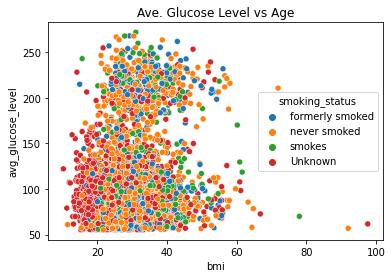

In [ ]:
# Three-variable scatter plot
plt.figure()
sns.scatterplot(x='bmi', y='avg_glucose_level', hue='smoking_status', data=df)
plt.title('Ave. Glucose Level vs Age')


# Final Preprocessing and Cleaning
* convert categorical to numeric data

In [ ]:
# more clean up
# only compare male and female
df = df[df.gender != 'Other']
#replace smoking strings with numerical representation, replace gender with binary representation
df = df.replace({'never smoked':0,'formerly smoked':1,'smokes':2,'Unknown':3,'Male':1,'Female':0})
dfdum = pd.get_dummies(df, drop_first=True)

print(dfdum.info())
print("Dummy shape: ",dfdum.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   int64  
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   avg_glucose_level  4908 non-null   float64
 5   bmi                4908 non-null   float64
 6   smoking_status     4908 non-null   int64  
 7   stroke             4908 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 345.1 KB
None
Dummy shape:  (4908, 8)


#Machine learning
* accuracy
* confusion matrix
* precision/recall
* ROC curve, precision/recall curve (if predictions are probabilities)
* MSE, RMSE
* R-squared statistic (usually computed on training data)
* predicted/actual scatterplot
* grid search to tune hyperparameters
* feature selection (such as forward feature selection)
* learning curve
* create training and test sets
* train model and make predictions
* assess results (classification case)
* assess result (regression case)
* tuning
* cross-validation can be used in both assessment and tuning
* assess bias/variance


In [ ]:
# mse and rmse helper
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

def mse(predicted, actual):
    return np.square(actual - predicted).mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


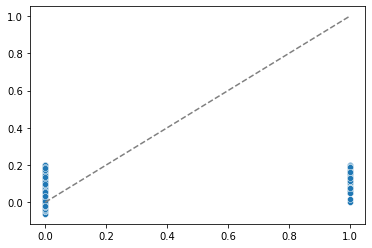

In [ ]:
# training data linear regression
# column names changed due to dummy data
predictions = ['gender','age','hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']
target = ['stroke']
x = dfdum[predictions].values
y = dfdum[target].values

# create training model that predics stroke occurance based on
# age, hypertension, smoking_habits
dfPred1Cols = ['age', 'hypertension', 'smoking_status']
dfPred1 = dfdum[(df.age >= 40) & (df.hypertension == 1) & (df.smoking_status == 1) | (df.smoking_status == 2)]
x1 = dfPred1[dfPred1Cols].values
y1 = dfPred1[target].values

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=0)
reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
reg.fit(x_train,y_train)
pred1 = reg.predict(x1)

plt.figure()
sns.scatterplot(y1.ravel(), pred1.ravel())
plt.plot([0,1],[0,1], color='grey', linestyle='dashed')